## Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters
import scipy.stats


import shelfy.models.image_processing as ip

## Spine detection

In [ ]:
# Load image
shelf = 'home_6'
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/' + shelf + '/'
file_name = shelf + '.jpg'
file_path = file_directory + file_name
img = cv2.imread(file_path)

In [ ]:
lines = ip.get_book_lines(img, debug = True)

## Shelf detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters
import scipy.stats


import shelfy.models.image_processing as ip

In [2]:
# Load image
shelf = 'home_6'
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/' + shelf + '/'
file_name = shelf + '.jpg'
file_path = file_directory + file_name
img = cv2.imread(file_path)

gaussian blur


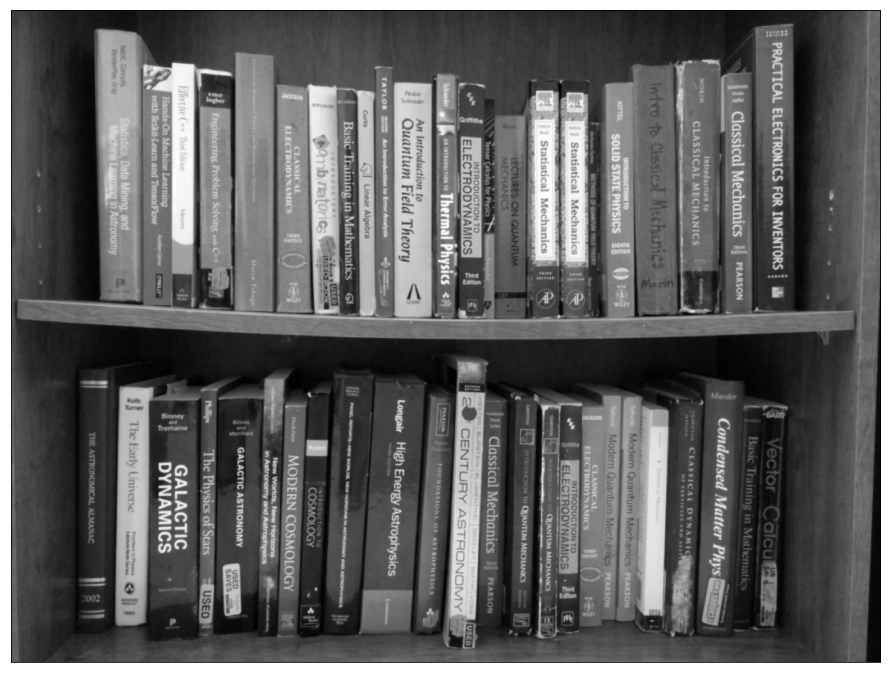

downsample 0


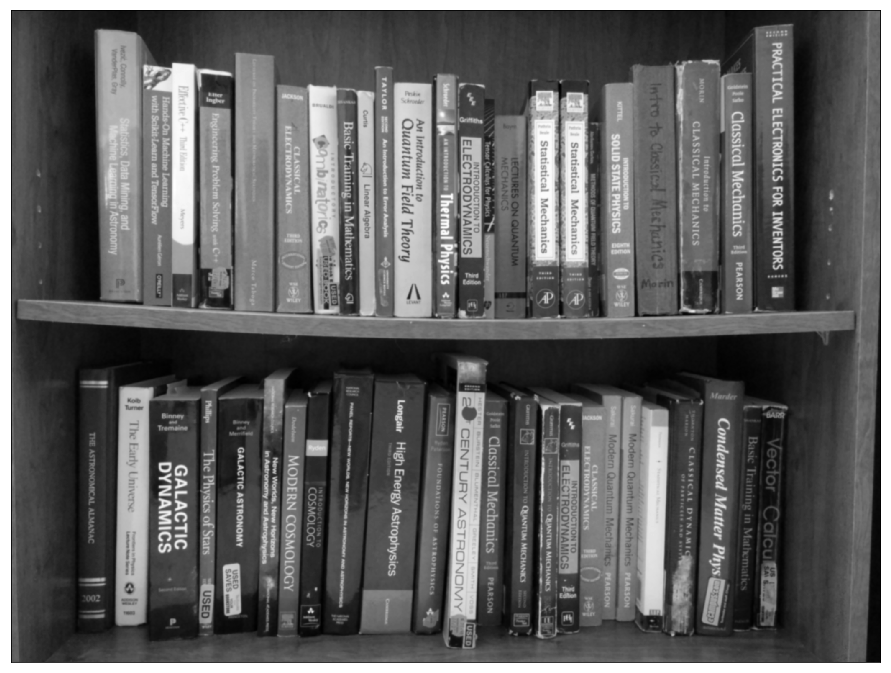

downsample 1


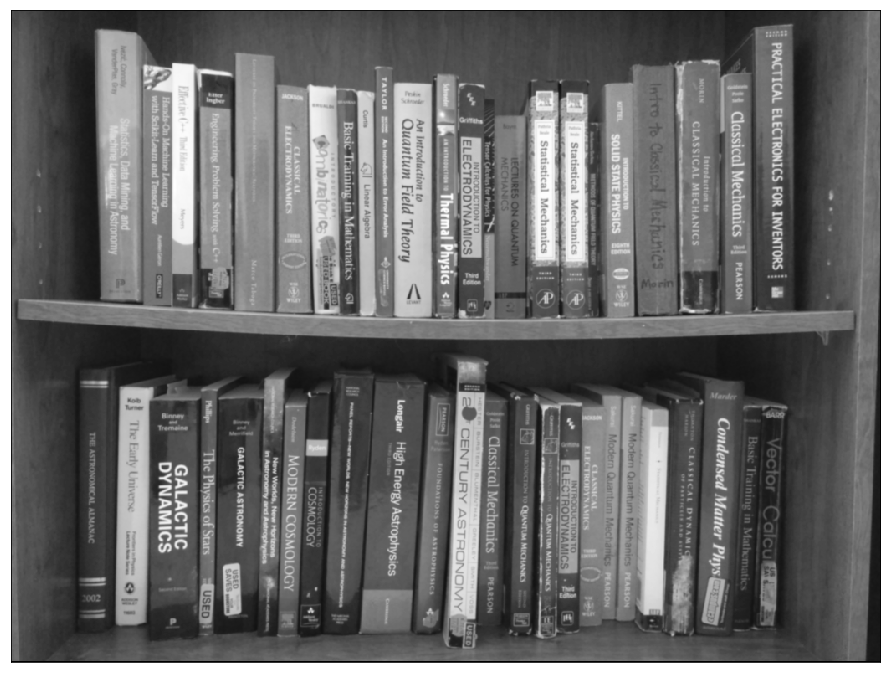

downsample 2


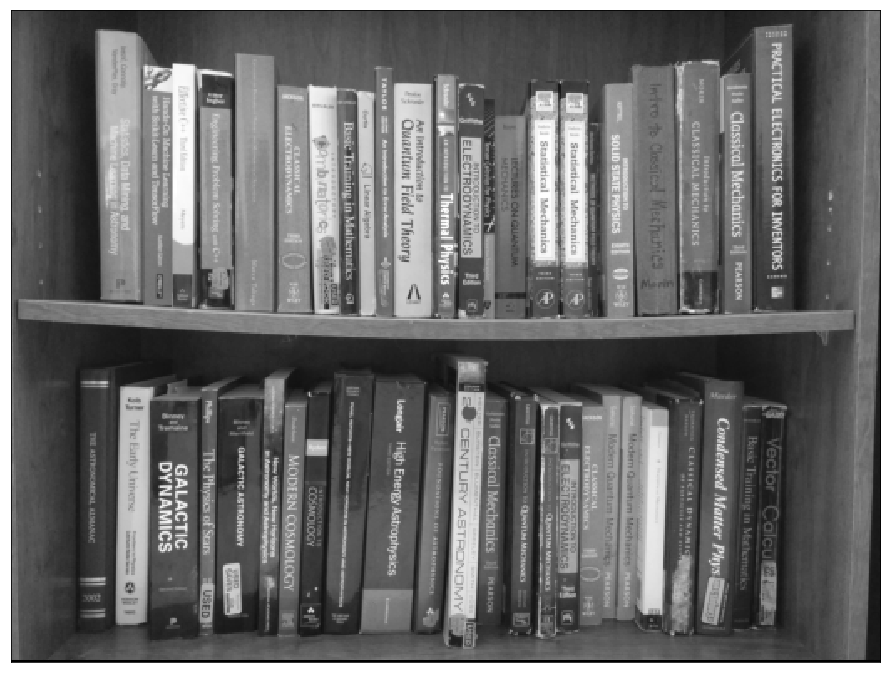

laplace squared


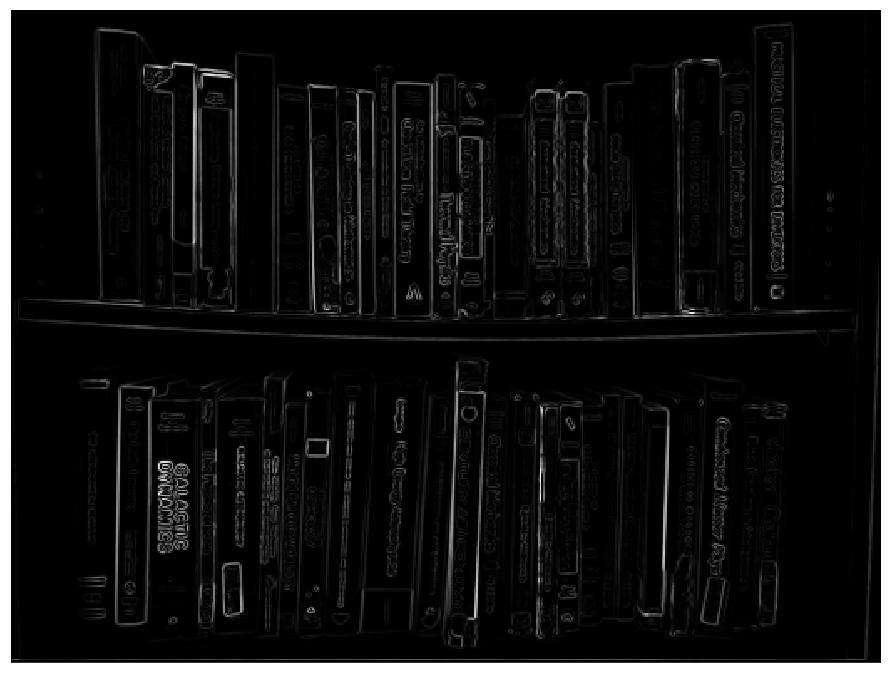

standardize


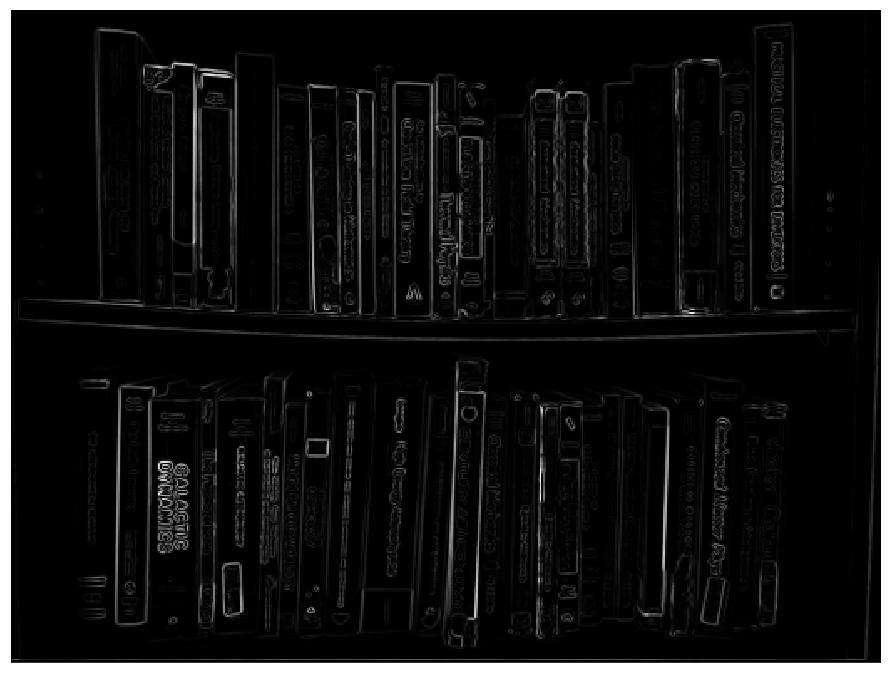

binarize


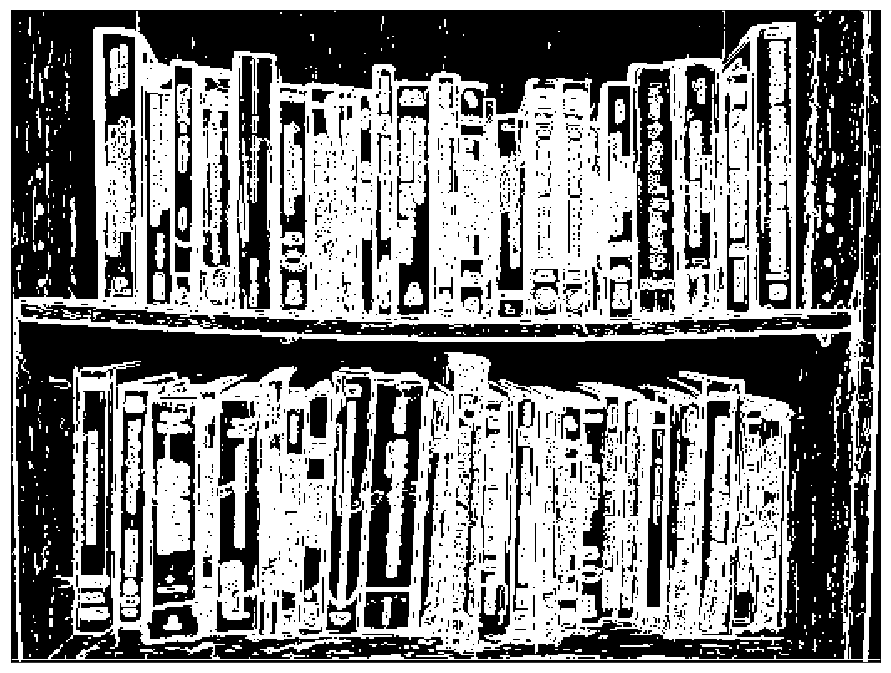

vertical dilate


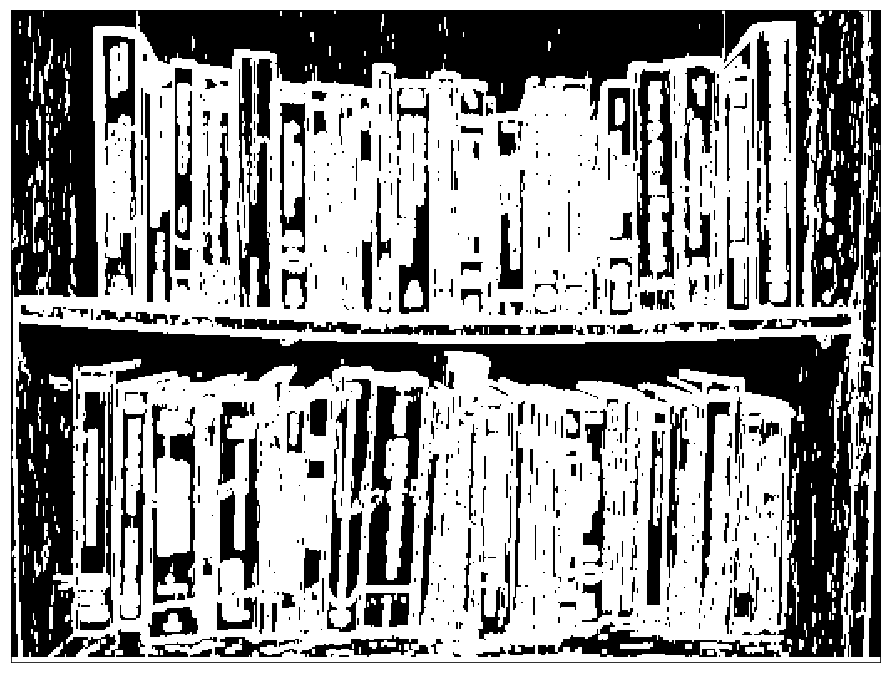

horizontal erode


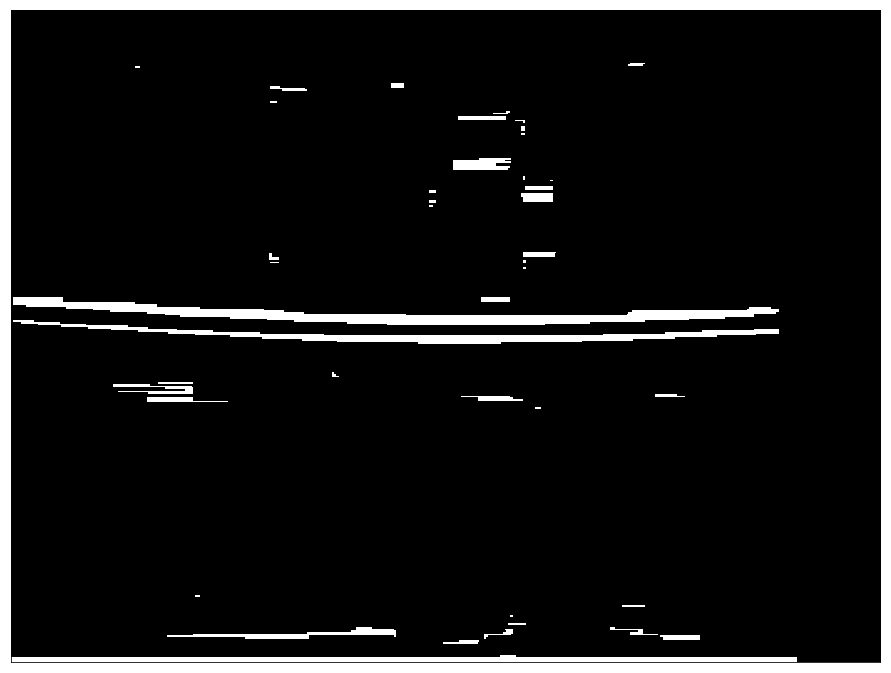

find connected components, levels =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


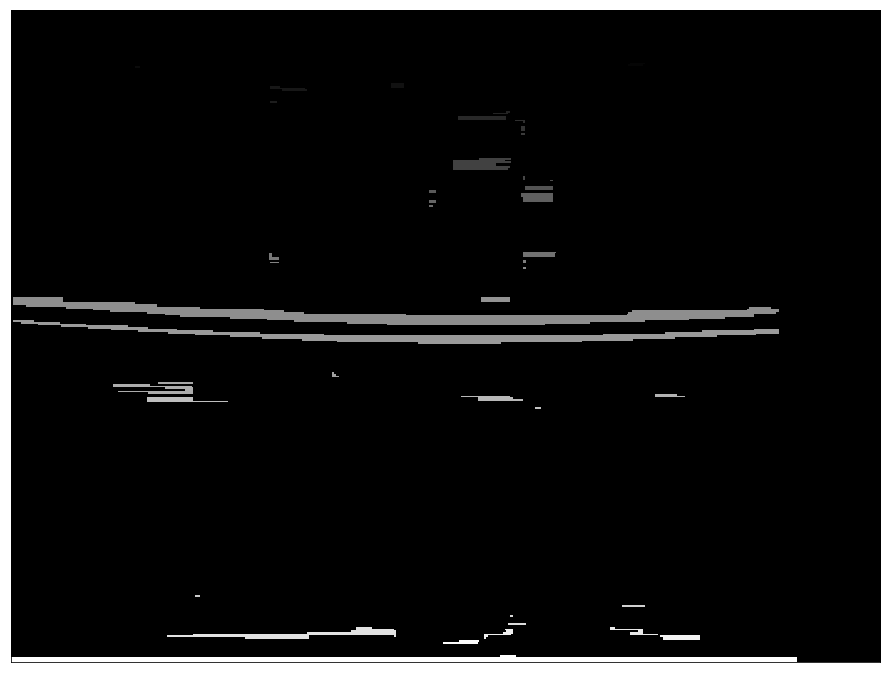

remove short clusters


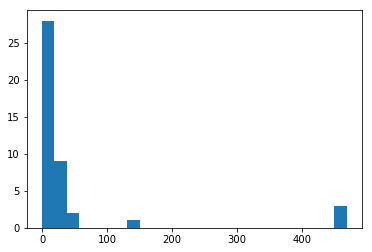

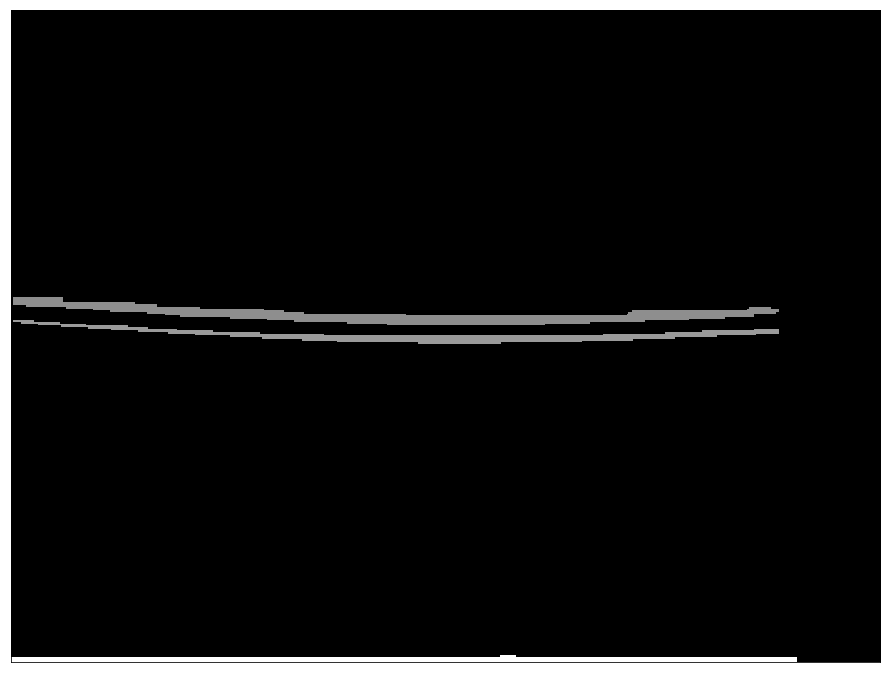

upsample


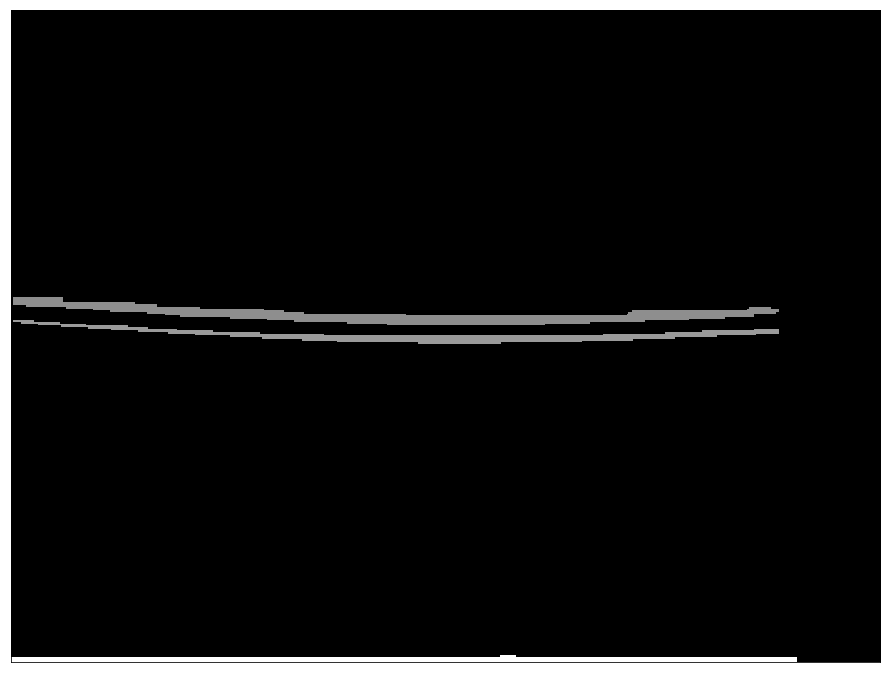

find connected components, levels =  [1, 2, 3]


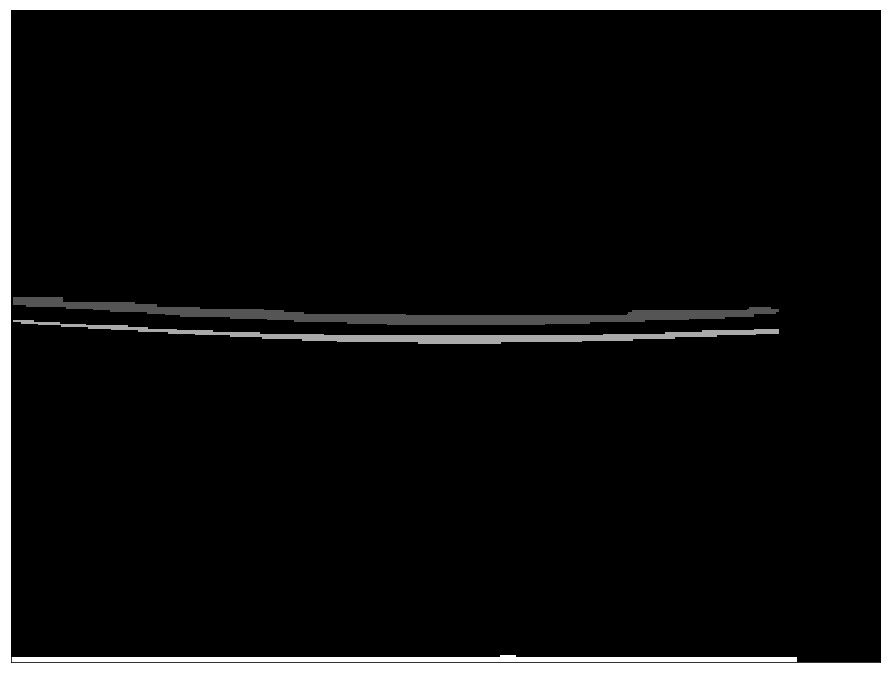

NameError: name 'get_lines_from_img' is not defined

In [3]:
ip.get_shelves(img, debug = True)

## Workshop

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters
import scipy.stats


import shelfy.models.image_processing as ip

In [ ]:
# Load image
shelf = 'insight_3'
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/' + shelf + '/'
file_name = shelf + '.jpg'
file_path = file_directory + file_name
img = cv2.imread(file_path)

In [ ]:
debug = True

# Colorize
#proc_img = np.mean(img, axis = 2)
proc_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,2]


# Blur
proc_img = ip.gaussian_blur(proc_img, sigma = 3, debug = debug)


# Sobel
proc_img = ip.laplace_squared(proc_img, debug = debug)

# Standardize
proc_img = ip.standardize(proc_img, debug = debug)





# Binarize
proc_img = ip.binarize(proc_img, cutoff = 0.01, debug = debug)

# Erode subtract
#structure_length = 5
#iterations = 1
#proc_img = ip.erode_subtract(proc_img, structure_length, debug = debug)

    

for i in range(50):
    # Erode
    proc_img = ip.vertical_erode(proc_img, structure_length = 1, iterations = 2, debug = debug)
    # Dilate
    proc_img = ip.vertical_dilate(proc_img, structure_length = 1, iterations = 1, debug = debug)

'''# Hough
lines = cv2.HoughLines(proc_img.astype(np.uint8),1,np.pi/180,200)
plt.imshow(proc_img, cmap = 'gray')
for rho, theta in lines[:,0,:]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    plt.plot([x1,x2],[y1,y2])

plt.xlim(0, proc_img.shape[1])
plt.ylim(proc_img.shape[0], 0)

plt.show()
'''
    